# 1. Obtaining the intrinsic $\dot{P}$
##  (1) consider the effect of Milk way and proper motion using package $\tt {GalDynPsr}$
##  (2) for the pulsar in Globular cluster, $\dot{P}_{int}=mean(\dot{P}_{obs}-\dot{P}_{galaxy}-\dot{P}_{proper\_motion}±\dot{P}_{gc})$. 
# 2. estimating the minimum $P$ and $\dot{P}$
##  (1) spin-up line.
##  (2) the lower limit for P is 1 ms.
##  (3) the maximum evolution time $t_{\rm {max}}$ less than the age of Milk way age 11 Gyr.
# 3. get birth P and $\dot{P}$
##  (1) $t_{random} = u(0,t_{\rm max})$
##  (2) $P_{birth}=P_{obs}\sqrt{1-2\dot{P}_{int}t_{random} / P_{obs}}$
# 4. Calculating accreted mass
##  (1) Tauris12 $\Delta M_{\mathrm{1}}=0.24 \mathrm{M}_{\odot} \frac{\left(M / \mathrm{M}_{\odot}\right)^{1 / 3}}{(P_{\mathrm{eq}}/\mathrm{ms})^{4 / 3}}$
##  (2) Li21 $\Delta M_{\mathrm{2}} = Normal( 0.28~\mathrm{M}_{\odot} (P_{\rm{eq}}/\rm{ms})^{-1/2}, (0.28~\mathrm{M}_{\odot} (P_{\rm{eq}}/\rm{ms})^{-1/2}- \Delta M_{\mathrm{1}})/3 )   $
# 5. Getting birth mass

### Load data: Recycled and slow data for double PSR 

In [8]:
import numpy as np

In [5]:
# load data
import pandas as pd
slo_data=pd.read_csv('slo_data.txt',sep=' ')
rec_data=pd.read_csv('rec_data.txt',sep=' ')
data=pd.read_csv('data.txt',sep=' ')

#if repeating, please delete
del rec_data['p0']
del rec_data['p1']
del rec_data['pb']
rec_bns=rec_data.iloc[27:,:]

file=open('PSR_BNSmass_New.txt')
data=file.readlines()
with open('PSR.txt','w') as m:
    for line in data:
        m.write(' '.join(line.split()))
        m.write('\n')
data_psr_bns=pd.read_csv('PSR.txt',sep=' ',header=None,names=['name','m','merr','mc','mcerr','mt','mterr','p0','p1','pb','e'])
psr_rec=(pd.concat([data_psr_bns.iloc[0:-1,:],rec_bns.iloc[:,1:6].reset_index(drop=True)],axis=1)).reset_index(drop=True)
psr_rec

,name,m,merr,mc,mcerr,mt,mterr,p0,p1,pb,e,pmra,pmdec,gl,gb,dl
0,J1756$-$2251,1.3410,0.0070,1.2300,0.0070,2.569990,0.000060,0.028462,1.017502e-18,0.319634,0.180569,-2.420,0.000,6.499,0.948,0.7300
1,J0737$-$3039A/B,1.3381,0.0007,1.2489,0.0007,2.587080,0.000160,0.022699,1.759928e-18,0.102252,0.087777,0.000,0.000,245.236,-4.505,0.5200
2,B1534+12,1.3330,0.0002,1.3455,0.0002,2.678463,0.000004,0.037904,2.422494e-18,0.420737,0.273678,1.482,-25.285,19.848,48.341,1.0510
3,J1757$-$1854,1.3384,0.0009,1.3946,0.0009,2.732950,0.000090,0.021497,2.630300e-18,0.183538,0.605814,0.000,0.000,9.966,2.877,19.5590
4,J0509+3801,1.3400,0.0800,1.4600,0.0800,2.805000,0.003000,0.076541,7.931140e-18,0.379584,0.586400,0.000,0.000,168.275,-1.187,1.5620
5,B1913+16,1.4398,0.0002,1.3886,0.0002,2.828378,0.000007,0.059030,8.628073e-18,0.322997,0.617133,-0.720,-0.030,49.968,2.122,4.1670
6,J1913+1102,1.6200,0.0300,1.2700,0.0300,2.888700,0.000600,0.027285,1.608059e-19,0.206252,0.089540,0.000,0.000,45.250,0.194,7.1400
7,J0453+1559,1.5590,0.0050,1.1740,0.0040,2.733000,0.004000,0.045782,1.861200e-19,4.072469,0.112518,-5.500,-6.000,184.125,-17.137,0.5220
8,J1829+2456,1.3060,0.0040,1.2990,0.0040,2.605500,0.000200,0.041010,5.250000e-20,1.176028,0.139141,0.000,0.000,53.343,15.612,0.9150
9,B2127+11C,1.3580,0.0100,1.3540,0.0100,2.712790,0.000130,0.030529,4.987890e-18,0.335282,0.681395,-1.300,-3.300,65.030,-27.315,10.4000


###  NS-WD recycled and slow data

In [6]:
nswd_data=pd.read_excel('NSmass_precise.xlsx')
ex_dat=pd.read_csv('ex_dat.txt',sep=';',names=['nu','nam','pmra','pmdec','gl','gb','dl','nan'])
del ex_dat['nu']
del ex_dat['nan']
nswd_rec=(pd.concat([(nswd_data.iloc[:,:]),(ex_dat.iloc[:,:]).reset_index(drop=True)],axis=1)).reset_index(drop=True)
del nswd_rec['ref']
del nswd_rec['type']
del nswd_rec['nam']
nswd_recdat=nswd_rec.iloc[:-1,:]
nswd_slodat=nswd_rec.iloc[24:,:]
nswd_recdat
#nswd_slodat

,name,m,merr,mc,p0,p1,pb,e,pmra,pmdec,gl,gb,dl
0,J1023+0038,1.7100,0.1600,0.2400,0.001688,6.930000e-21,0.198096,0.000000e+00,4.760,-17.340,243.490,45.782,1.368
1,J1903+0327,1.6660,0.0120,1.0330,0.002150,1.882080e-20,95.174119,4.366784e-01,-2.060,-5.210,37.336,-1.014,6.122
2,J2043+1711,1.3800,0.1300,0.1730,0.002380,5.243700e-21,1.482291,4.870000e-06,-5.722,-10.831,61.919,-15.313,1.562
3,J1125−6014,1.5000,0.2000,0.3100,0.002630,4.010000e-21,8.752604,6.150000e-07,11.108,-13.047,292.504,0.894,0.989
4,J0337+1715,1.4359,0.0003,0.1973,0.002733,1.766600e-20,1.629402,6.917800e-04,4.810,-4.420,169.990,-30.039,1.300
5,J0740+6620,2.0800,0.0700,0.2600,0.002886,1.219042e-20,4.766940,5.070000e-06,-10.319,-30.867,149.730,29.599,0.929
6,J1909-3744,1.4860,0.0110,0.2080,0.002947,1.402541e-20,1.533449,1.070000e-07,-9.512,-35.782,359.731,-19.596,1.140
7,J1614-2230,1.9080,0.0160,0.4930,0.003151,9.624190e-21,8.686619,1.336000e-06,3.814,-32.484,352.636,20.192,0.700
8,J1946+3417,1.8280,0.0220,0.2556,0.003170,3.118000e-21,27.019948,1.344954e-01,-7.010,4.510,69.294,4.713,6.941
9,J1910-5959A,1.3300,0.1100,0.1800,0.003266,2.947030e-21,0.837113,3.400000e-06,-3.080,-3.970,336.525,-25.730,4.000


 # 1. calculating $\dot{P}_{int}$  using GalDynPsr no considering Globular cluster potential. The package is from: Pathak, D., & Bagchi, M. 2018, ApJ, 868.

In [7]:
import GalDynPsr 
import numpy as np
nswd_rec_expl=np.zeros(len(nswd_recdat['gl']))
for i in range(len(nswd_recdat['gl'])):
    nswd_rec_expl[i]=GalDynPsr.modelA.Expl(nswd_recdat['gl'][i], 0, nswd_recdat['gb'][i], 0, nswd_recdat['dl'][i], 0) 
nswd_rec_exz=np.zeros(len(nswd_recdat['gl']))
for i in range(len(nswd_recdat['gl'])):
    nswd_rec_exz[i]=GalDynPsr.modelA.Exz(nswd_recdat['gl'][i], 0, nswd_recdat['gb'][i], 0, nswd_recdat['dl'][i], 0) 
nswd_rec_shk=np.zeros(len(nswd_recdat['gl']))
for i in range(len(nswd_recdat['gl'])):
    nswd_rec_shk[i]=GalDynPsr.Shk.Exshk(nswd_recdat['dl'][i], 0,nswd_recdat['pmra'][i],0,nswd_recdat['pmdec'][i],0) 

Gal_int=GalDynPsr.pdotint.Pdotint(nswd_rec_expl,nswd_rec_exz,nswd_rec_shk,nswd_recdat['p1'],nswd_recdat['p0'])
Gal_int=pd.DataFrame(Gal_int,columns=['pdot_int'])

psr_rec_expl=np.zeros(len(psr_rec['gl']))
for i in range(len(psr_rec['gl'])):
    psr_rec_expl[i]=GalDynPsr.modelA.Expl(psr_rec['gl'][i], 0, psr_rec['gb'][i], 0, psr_rec['dl'][i], 0)
psr_rec_exz=np.zeros(len(psr_rec['gl']))
for i in range(len(psr_rec['gl'])):
    psr_rec_exz[i]=GalDynPsr.modelA.Exz(psr_rec['gl'][i], 0, psr_rec['gb'][i], 0, psr_rec['dl'][i], 0) 
psr_rec_shk=np.zeros(len(psr_rec['gl']))
for i in range(len(psr_rec['gl'])):
    psr_rec_shk[i]=GalDynPsr.Shk.Exshk(psr_rec['dl'][i], 0,psr_rec['pmra'][i],0,psr_rec['pmdec'][i],0) 

Gal_psr_int=GalDynPsr.pdotint.Pdotint(psr_rec_expl,psr_rec_exz,psr_rec_shk,psr_rec['p1'],psr_rec['p0'])    
Gal_psr_int=pd.DataFrame(Gal_psr_int,columns=['pdot_int'])
#####
rec_nswd=(pd.concat([nswd_recdat,Gal_int.reset_index(drop=True)],axis=1)).reset_index(drop=True)
rec_psr=(pd.concat([psr_rec,Gal_psr_int.reset_index(drop=True)],axis=1)).reset_index(drop=True)

Odering of arguments in all functions in GalDynPsr is very important. Consult the README.md (online) or the README.txt file residing in the installation directory
/home4/yzq/anaconda3/envs/jupyter/lib/python3.8/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



In [146]:
rec_psr

,name,m,merr,mc,mcerr,mt,mterr,p0,p1,pb,e,pmra,pmdec,gl,gb,dl,pdot_int
0,J1756$-$2251,1.3410,0.0070,1.2300,0.0070,2.569990,0.000060,0.028462,1.017502e-18,0.319634,0.180569,-2.420,0.000,6.499,0.948,0.7300,1.015396e-18
1,J0737$-$3039A/B,1.3381,0.0007,1.2489,0.0007,2.587080,0.000160,0.022699,1.759928e-18,0.102252,0.087777,0.000,0.000,245.236,-4.505,0.5200,1.760550e-18
2,B1534+12,1.3330,0.0002,1.3455,0.0002,2.678463,0.000004,0.037904,2.422494e-18,0.420737,0.273678,1.482,-25.285,19.848,48.341,1.0510,2.364362e-18
3,J1757$-$1854,1.3384,0.0009,1.3946,0.0009,2.732950,0.000090,0.021497,2.630300e-18,0.183538,0.605814,0.000,0.000,9.966,2.877,19.5590,2.653844e-18
4,J0509+3801,1.3400,0.0800,1.4600,0.0800,2.805000,0.003000,0.076541,7.931140e-18,0.379584,0.586400,0.000,0.000,168.275,-1.187,1.5620,7.923556e-18
5,B1913+16,1.4398,0.0002,1.3886,0.0002,2.828378,0.000007,0.059030,8.628073e-18,0.322997,0.617133,-0.720,-0.030,49.968,2.122,4.1670,8.644919e-18
6,J1913+1102,1.6200,0.0300,1.2700,0.0300,2.888700,0.000600,0.027285,1.608059e-19,0.206252,0.089540,0.000,0.000,45.250,0.194,7.1400,1.796002e-19
7,J0453+1559,1.5590,0.0050,1.1740,0.0040,2.733000,0.004000,0.045782,1.861200e-19,4.072469,0.112518,-5.500,-6.000,184.125,-17.137,0.5220,1.819250e-19
8,J1829+2456,1.3060,0.0040,1.2990,0.0040,2.605500,0.000200,0.041010,5.250000e-20,1.176028,0.139141,0.000,0.000,53.343,15.612,0.9150,5.501465e-20
9,B2127+11C,1.3580,0.0100,1.3540,0.0100,2.712790,0.000130,0.030529,4.987890e-18,0.335282,0.681395,-1.300,-3.300,65.030,-27.315,10.4000,5.001327e-18


In [147]:
rec_nswd

,name,m,merr,mc,p0,p1,pb,e,pmra,pmdec,gl,gb,dl,pdot_int
0,J1023+0038,1.7100,0.1600,0.2400,0.001688,6.930000e-21,0.198096,0.000000e+00,4.760,-17.340,243.490,45.782,1.368,5.396321e-21
1,J1903+0327,1.6660,0.0120,1.0330,0.002150,1.882080e-20,95.174119,4.366784e-01,-2.060,-5.210,37.336,-1.014,6.122,1.882368e-20
2,J2043+1711,1.3800,0.1300,0.1730,0.002380,5.243700e-21,1.482291,4.870000e-06,-5.722,-10.831,61.919,-15.313,1.562,4.195407e-21
3,J1125−6014,1.5000,0.2000,0.3100,0.002630,4.010000e-21,8.752604,6.150000e-07,11.108,-13.047,292.504,0.894,0.989,2.329222e-21
4,J0337+1715,1.4359,0.0003,0.1973,0.002733,1.766600e-20,1.629402,6.917800e-04,4.810,-4.420,169.990,-30.039,1.300,1.735079e-20
5,J0740+6620,2.0800,0.0700,0.2600,0.002886,1.219042e-20,4.766940,5.070000e-06,-10.319,-30.867,149.730,29.599,0.929,5.431411e-21
6,J1909-3744,1.4860,0.0110,0.2080,0.002947,1.402541e-20,1.533449,1.070000e-07,-9.512,-35.782,359.731,-19.596,1.140,2.700298e-21
7,J1614-2230,1.9080,0.0160,0.4930,0.003151,9.624190e-21,8.686619,1.336000e-06,3.814,-32.484,352.636,20.192,0.700,3.860203e-21
8,J1946+3417,1.8280,0.0220,0.2556,0.003170,3.118000e-21,27.019948,1.344954e-01,-7.010,4.510,69.294,4.713,6.941,1.107034e-21
9,J1910-5959A,1.3300,0.1100,0.1800,0.003266,2.947030e-21,0.837113,3.400000e-06,-3.080,-3.970,336.525,-25.730,4.000,1.870449e-21


# Correcting the negativa $\dot{P}_{int}$ for J2222-0137 with data form: David L. Kaplan et al 2014 ApJ 789 119

In [ ]:
# the column number 22 for J2222-0137: we use the intrinsic p_dot from  David L. Kaplan et al 2014 ApJ 789 119 , since the negtivate value.  
rec_nswd['pdot_int'][22]=1.54*10**(-20)

## (2)The effect including our Galaxy $\dot{P}_{galaxy}$, proper motion $\dot{P}_{proper\_motion}$ and globular cluster potention $\dot{P}_{globular\_cluster}$ (if the PSR is in globular cluster). Where $\dot{P}_{globular\_cluster}$ is the maximum effect, $P_{\rm globular\_cluster} = \frac{a_{\rm globular\_cluster}}{c} \le \frac{3 \sigma_{\rm v}^2}{2(r_{\rm c}^2 + r_{\rm off}^2)^{1/2}}$. The intrinsic $\dot{P}$ is $\dot{P}_{int}=mean(\dot{P}_{obs}-\dot{P}_{galaxy}-\dot{P}_{proper\_motion}±\dot{P}_{globular\_cluster})$.

In [8]:
import numpy as np
import astropy.units as units
import astropy.constants as const
# Galactic correction
def p1_galactic(P0, b, l, D, R0):
    """
    calculating the effect of Milky way galaxy
    paramaters:
    _______
    P0: observed period for a PSR
    b,l,D: the location of the PSR
    R0: the radio of Milky way galaxy
    ______
    return : the effect of Milky way galaxy
    """
    R0_D_ratio = R0 / D
    cosb_cosc  = np.cos(b) * np.cos(l)
    coeff      = cosb_cosc + (R0_D_ratio - cosb_cosc) / (1 + R0_D_ratio**2 - 2 * R0_D_ratio * cosb_cosc)
    p1_gal     = -7e-19 * P0 * coeff
    return p1_gal

# Globular cluster's correction
def p1_gc_max(P0, sig_v, radius_c, offset):
    a_gc_max   = 3 * sig_v**2 / (2 * (radius_c ** 2 + (offset * radius_c)**2)**0.5)
    p1_gc_max  = P0 * a_gc_max / const.c
    return p1_gc_max


# considering the globular potential for J1910-5959A

In [68]:
# NGC 6752

sig_v    = 4.9 * units.km / units.s
size_core= 0.17 * (units.arcmin).to(units.rad)
distance = 4.0 * units.kpc
radius_c = size_core * distance
l, b     = 336.49* units.degree, -25.63 * units.degree

# Solar Galactocentric distance
R0 = 8.3 * units.kpc

# 1910-5959A

p0 = 0.00326618 * units.s
p1_obs = 2.94703e-21

# max effect from gc
p1_gc = p1_gc_max(p0, sig_v, radius_c, 6.39 / 0.17)
#print(p1_gc.decompose())


# galactic correction
p1_gal = p1_galactic(p0, b, l, distance, R0) / units.s
#print(p1_gal)


# proper motion
p1_pm = (5 * units.mas / units.yr)**2 * distance / const.c * p0

if ( p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2 ) > 0:
    p1J1910_5959A=( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0.5*(p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2) )
else: p1J1910_5959A = ( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0 )

In [69]:
p1_gc.decompose()

<Quantity 1.7096676e-21>

# considering the globular potential for B2127+11C

In [70]:
# M15, NGC 7078  gl: 65.030 gb: -27.315 dl:10.4000

sig_v    = 13.5 * units.km / units.s
size_core= 0.14 * (units.arcmin).to(units.rad)
distance = 10.4 * units.kpc
radius_c = size_core * distance
l, b     = 65.030 * units.degree, -27.315 * units.degree

# B2127+11C
# Solar Galactocentric distance
R0 = 8.3 * units.kpc

p0 = 0.030529 * units.s
p1_obs =4.987890e-18

# max p1_int
p1_gc = p1_gc_max(p0, sig_v, radius_c, 6.39 / 0.17)

# galactic correction
p1_gal = p1_galactic(p0, b, l, distance, R0) / units.s


# proper motion
p1_pm = (5 * units.mas / units.yr)**2 * distance / const.c * p0

if p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2 > 0:
    p1B2127_11C=( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0.5*(p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2) )
else: p1B2127_11C=( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0 )

In [71]:
p1_gc.decompose()

<Quantity 5.66509322e-20>

# considering the globular potential for J1807-2500B

In [72]:
# NGC 6544
sig_v    = 5.89 * units.km / units.s
size_core= 0.05 * (units.arcmin).to(units.rad)
distance = 2.8973 * units.kpc
radius_c = size_core * distance
l, b     = 5.83 * units.degree, -2.20 * units.degree

# Solar Galactocentric distance
R0 = 8.3 * units.kpc

# 1807-2459B
p0     = 0.004186 * units.s
p1_obs = 8.232450e-20 

# max p1_int
# max p1_int
p1_gc = p1_gc_max(p0, sig_v, radius_c, 4.05)

# galactic correction
p1_gal = p1_galactic(p0, b, l, distance, R0) / units.s
#print(p1_gal)


# proper motion
p1_pm = (5 * units.mas / units.yr)**2 * distance / const.c * p0

if  p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2> 0:
    p1J1807_2500B=( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0.5*(p1_obs - p1_gc - p1_gal - p1_pm / units.rad**2) )
else:  p1J1807_2500B=( 0.5*(p1_obs + p1_gc - p1_gal - p1_pm / units.rad**2) + 0 )


In [73]:
p1_gc.decompose()

<Quantity 1.33953608e-19>

In [12]:
p1J1910_5959A, p1B2127_11C, p1J1807_2500B

(<Quantity 5.56627559e-21>,
 <Quantity 4.98532985e-18>,
 <Quantity 1.10007805e-19>)

In [13]:
# 9 for J1910-5959A, in globular cluster
rec_nswd['pdot_int'][9]=p1J1910_5959A
# 9 f0r J2127+11C, in globular cluster
rec_psr['pdot_int'][9]=p1B2127_11C
# 10 for J1907-2500B, in globular cluster
rec_psr['pdot_int'][10]=p1J1807_2500B

# save data
rec_nswd.to_csv('rec_nswd.txt',index=False)
rec_psr.to_csv('rec_psr.txt',index=False)

/tmp/ipykernel_24176/2644083993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_nswd['pdot_int'][22]=1.54*10**(-20)

/tmp/ipykernel_24176/2644083993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_nswd['pdot_int'][9]=p1J1910_5959A

/tmp/ipykernel_24176/2644083993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_psr['pdot_int'][9]=p1B2127_11C

/tmp/ipykernel_24176/2644083993.py:9: SettingWithCopyWarning: 
A value 

In [14]:
# load data
import pandas as pd
rec_nswd=pd.read_csv('rec_nswd.txt')
rec_psr=pd.read_csv('rec_psr.txt')

In [43]:
rec_psr

,name,m,merr,mc,mcerr,mt,mterr,p0,p1,pb,e,pmra,pmdec,gl,gb,dl,pdot_int
0,J1756$-$2251,1.3410,0.0070,1.2300,0.0070,2.569990,0.000060,0.028462,1.017502e-18,0.319634,0.180569,-2.420,0.000,6.499,0.948,0.7300,1.015396e-18
1,J0737$-$3039A/B,1.3381,0.0007,1.2489,0.0007,2.587080,0.000160,0.022699,1.759928e-18,0.102252,0.087777,0.000,0.000,245.236,-4.505,0.5200,1.760550e-18
2,B1534+12,1.3330,0.0002,1.3455,0.0002,2.678463,0.000004,0.037904,2.422494e-18,0.420737,0.273678,1.482,-25.285,19.848,48.341,1.0510,2.364362e-18
3,J1757$-$1854,1.3384,0.0009,1.3946,0.0009,2.732950,0.000090,0.021497,2.630300e-18,0.183538,0.605814,0.000,0.000,9.966,2.877,19.5590,2.653844e-18
4,J0509+3801,1.3400,0.0800,1.4600,0.0800,2.805000,0.003000,0.076541,7.931140e-18,0.379584,0.586400,0.000,0.000,168.275,-1.187,1.5620,7.923556e-18
5,B1913+16,1.4398,0.0002,1.3886,0.0002,2.828378,0.000007,0.059030,8.628073e-18,0.322997,0.617133,-0.720,-0.030,49.968,2.122,4.1670,8.644919e-18
6,J1913+1102,1.6200,0.0300,1.2700,0.0300,2.888700,0.000600,0.027285,1.608059e-19,0.206252,0.089540,0.000,0.000,45.250,0.194,7.1400,1.796002e-19
7,J0453+1559,1.5590,0.0050,1.1740,0.0040,2.733000,0.004000,0.045782,1.861200e-19,4.072469,0.112518,-5.500,-6.000,184.125,-17.137,0.5220,1.819250e-19
8,J1829+2456,1.3060,0.0040,1.2990,0.0040,2.605500,0.000200,0.041010,5.250000e-20,1.176028,0.139141,0.000,0.000,53.343,15.612,0.9150,5.501465e-20
9,B2127+11C,1.3580,0.0100,1.3540,0.0100,2.712790,0.000130,0.030529,4.987890e-18,0.335282,0.681395,-1.300,-3.300,65.030,-27.315,10.4000,4.985000e-18


# 2. calculate $t_c$, $P_{birth}^{min}$,$\dot{P}_{birth}$ and slove the intersection of stable accretion

In [48]:
import astropy
import astropy.units as u 

def pdot_mag(p,B_mag):
    """
    get Pdot for a constant magnetic field 
    paramaters:
    -------
    p: the period, uni, s
    B_mag: the value of constant magnetic field, unit: G 
    -------
    return:
    p_dot
    
    """
    return (B_mag / 3.2e19)**2 / p
    

def pdot_year(p,year):
    """
    get Pdot for a constant age
    paramaters:
    -------
    p: the period, uni, s
    year: the value of the constant age, unit: yr
    -------
    return:
    p_dot
    
    """
    return 0.5*p/(year*365*24*60*60)

def t_c(p,pdot):
    """
    callculate the characteristic age given p and pdot
    paramaters:
    -----
    p,pdot: i.e. period and period derivative; units= s , none
    return :
    the characteristic age; unit = Gyr
    
    """
    return (p/(2*pdot))*u.s.to(u.Gyr) #unit Gyr

def p_pdot_forb(p):
    
    """
    spin-up line
    paramaters:
    -----
    p: period ,unit: s
    return: p_dot
    """
    return 1.1*10**(-15)*p**(4/3)


def p_mid_sol(p,p_dot):
    """
    slove the intersection of two lines between the spin-up line and constatnt magnetic field lines to get period
    paramaters:
    ------
    input: p, p_dot, i.e. intrinsic period and period derivative
    return: 
    p_intsect, i.e. the period at the intersection between the spin-up line and the evolution trace of constant magnetic field
    """
    return (p_dot * p / ((1.1)*10**(-15)))**(3/7) ##mid 0 up +0.5 ##low -0.5

def p_dot_mid_sol(p,p_dot):
    """
    slove the intersection of two lines between the spin-up line and constatnt magnetic field lines to get pdot
    paramaters:
    ------
    input: p, p_dot, i.e. intrinsic period and period derivative
    return: 
    p_dot_intsect, i.e. the period derivative at the intersection between the spin-up line and the evolution trace of constant magnetic field
    """
    return ( (p_dot * p / ((1.1)*10**(-15)))**(4/7) ) * (1.1)*10**(-15)

In [43]:
# Case: NS-WD

tc=t_c(rec_nswd['p0'],rec_nswd['pdot_int'])
tc=pd.DataFrame(tc,columns=['tc'])
rec_nswd=pd.concat([rec_nswd,tc],axis=1)

In [44]:
# Case: Double NS

tc_psr=t_c(rec_psr['p0'],rec_psr['pdot_int'])
tc_psr=pd.DataFrame(tc_psr,columns=['tc'])
rec_psr=pd.concat([rec_psr,tc_psr],axis=1)

## (1) Get p and pdot on the spin-up line

In [18]:
# (1) Get p and pdot on the spin-up line

birth_psr=np.zeros((len(rec_psr['p0']),2))
birth_psr[:,0]=p_mid_sol(rec_psr['p0'],rec_psr['pdot_int'])
birth_psr[:,1]=p_dot_mid_sol(rec_psr['p0'],rec_psr['pdot_int'])

birth=np.zeros((len(rec_nswd['p0']),2))
birth[:,0]=p_mid_sol(rec_nswd['p0'],rec_nswd['pdot_int'])
birth[:,1]=p_dot_mid_sol(rec_nswd['p0'],rec_nswd['pdot_int'])

## (2) Set minimum p = 1 ms, re-compute its Pdot

In [ ]:
# Set minimum p = 1 ms, re-compute its Pdot

for i in range(len(birth)):
    if birth[i,0]<0.001:
        birth[i,0]=0.001 #p0
        birth[i,1]=rec_nswd['p0'][i]*rec_nswd['pdot_int'][i]/0.001 #p1

In [19]:
birth_data=pd.DataFrame(birth,columns=['p0_birth','p1_birth'])
birth_psr_data=pd.DataFrame(birth_psr,columns=['p0_birth','p1_birth'])
rec_nswd=(pd.concat([rec_nswd,birth_data.reset_index(drop=True)],axis=1)).reset_index(drop=True)
rec_psr=(pd.concat([rec_psr,birth_psr_data.reset_index(drop=True)],axis=1)).reset_index(drop=True)

In [ ]:
# if repeating please delete
del rec_psr['tc_b'] 
del rec_psr['tc']
del rec_nswd['tc_b']
del rec_nswd['tc']

In [20]:
# Characteristic age at 'minimum' birth period

tc_b=t_c(rec_nswd['p0_birth'],rec_nswd['p1_birth'])
tc_b_psr=t_c(rec_psr['p0_birth'],rec_psr['p1_birth'])

tc_b=pd.DataFrame(tc_b,columns=['tc_b'])
tc_b_psr=pd.DataFrame(tc_b_psr,columns=['tc_b'])
rec_nswd=pd.concat([rec_nswd,tc_b],axis=1)
rec_psr=pd.concat([rec_psr,tc_b_psr],axis=1)

## (3) calculating maximum age: $t_{\rm max} = t_{c, {\rm int}} - t_{c, {\rm minimum}} < 11Gyr$ 

In [21]:
tmax_nswd=(rec_nswd['tc']-rec_nswd['tc_b'])
tmax_psr=(rec_psr['tc']-rec_psr['tc_b'])

# set maximum age = 11 Gyr
for i in range(len(tmax_nswd)):
    if tmax_nswd[i]>11: #the age of milky way 11 Gyr
        tmax_nswd[i]=11
tmax_nswd=pd.DataFrame(tmax_nswd,columns=['tmax'])

for i in range(len(tmax_psr)):
    if tmax_psr[i]>11: #the age of milky way 11 Gyr
        tmax_psr[i]=11
tmax_psr=pd.DataFrame(tmax_psr,columns=['tmax'])

#del rec_nswd['tmax']
#del rec_psr['tmax']
rec_nswd=pd.concat([rec_nswd,tmax_nswd],axis=1)
rec_psr=pd.concat([rec_psr,tmax_psr],axis=1)

In [22]:
# get 'minimum' birth period for given age

def p_birth_lim(p0,p1,tr):
    """
    calculate the minimum birth period  
    paramaters:
    -----
    p0: observed period, unit: s
    p1: intrinsic period derivative, unit: none
    tr: age, unit: s 
    -----
    return: 
    minimum birth period, unit: s 
    
    """
    
    return p0*np.sqrt(1-(2*p1*tr)/p0)

def p1_birth_lim(p0,p1,tr):
    """
    calculate the period derivative corresponding to the minimum birth period 
    paramaters:
    -----
    p0: observed period, unit: s
    p1: intrinsic period derivative, unit: none
    tr: age, unit: s 
    -----
    return: 
    period derivative, unit: none
    
    """
    return p0*p1/p_birth_lim(p0,p1,tr)

In [23]:
p0_lim_nswd=p_birth_lim(rec_nswd['p0'],rec_nswd['pdot_int'],rec_nswd['tmax']*u.Gyr.to(u.s))
p1_lim_nswd=p1_birth_lim(rec_nswd['p0'],rec_nswd['pdot_int'],rec_nswd['tmax']*u.Gyr.to(u.s))
p0_lim_psr=p_birth_lim(rec_psr['p0'],rec_psr['pdot_int'],rec_psr['tmax']*u.Gyr.to(u.s))
p1_lim_psr=p1_birth_lim(rec_psr['p0'],rec_psr['pdot_int'],rec_psr['tmax']*u.Gyr.to(u.s))

In [24]:
p0_lim_nswd=pd.DataFrame(p0_lim_nswd,columns=['p0_birth_lim'])
p1_lim_nswd=pd.DataFrame(p1_lim_nswd,columns=['p1_birth_lim'])
p0_lim_psr=pd.DataFrame(p0_lim_psr,columns=['p0_birth_lim'])
p1_lim_psr=pd.DataFrame(p1_lim_psr,columns=['p1_birth_lim'])

In [25]:
rec_nswd=pd.concat([rec_nswd,p0_lim_nswd],axis=1)
rec_nswd=pd.concat([rec_nswd,p1_lim_nswd],axis=1)
rec_psr=pd.concat([rec_psr,p0_lim_psr],axis=1)
rec_psr=pd.concat([rec_psr,p1_lim_psr],axis=1)

In [26]:
mcer=np.zeros(len(rec_nswd['p0']))
mcer=pd.DataFrame(mcer,columns=['mcerr'])
rec_nswd=pd.concat([rec_nswd,mcer],axis=1)

# combine BNS and NSWD data

In [46]:
labels = ['name','m','merr','mc','mcerr','p0','p1','pb','pmra','pmdec','gl','gb',
          'dl','pdot_int','tc','p0_birth_lim','p1_birth_lim','tc_b','tmax']
rec_psr_a=rec_psr[labels]
rec_nswd_a=rec_nswd[labels]
data_a=(pd.concat([rec_psr_a,rec_nswd_a.reset_index(drop=True)],axis=0)).reset_index(drop=True)

In [75]:
data_a.to_csv('data_combined.csv', columns=['name','m','merr','mc','mcerr','p0','p1','pb','pmra','pmdec','gl','gb',
          'dl','pdot_int','tc','p0_birth_lim','p1_birth_lim','tc_b','tmax'],index=False)

# 3. p_birth_random from random U (0, tmax)

In [28]:
import astropy
import astropy.units as u 

nu=len(data_a['m'])
ns=5000
t_u=np.zeros(nu*ns)
p0_ns=np.zeros(nu*ns)
pdot_int_ns=np.zeros(nu*ns)

for i in range(nu):
    t_u[i*5000:(i+1)*5000]=np.random.uniform(0,(data_a['tmax'][i]),5000)            #unit Gyr
    p0_ns[i*5000:(i+1)*5000]=np.ones(ns)*data_a['p0'][i]                             #unit s
    pdot_int_ns[i*5000:(i+1)*5000]=np.ones(ns)*data_a['pdot_int'][i]                 #unit s*s-1
t_u=t_u*u.Gyr.to(u.s)  #transfer Gyr to s 

In [29]:
pran=np.zeros(nu*ns)
p1ran=np.zeros(nu*ns)
pran=p_birth_lim(p0_ns,pdot_int_ns,t_u)
p1ran=p1_birth_lim(p0_ns,pdot_int_ns,t_u)

p_birth_mean=np.zeros(nu)
p1_birth_mean=np.zeros(nu)
for i in range(nu):
    p_birth_mean[i]=np.mean(pran[i*5000:(i+1)*5000])
    p1_birth_mean[i]=(data_a['p0'][i]*data_a['pdot_int'][i])/p_birth_mean[i]

# $P-\dot{P}$ diagram, $\dot{P}_{\rm obs}$, $\dot{P}_{\rm int}$ and initial period and its derivative 

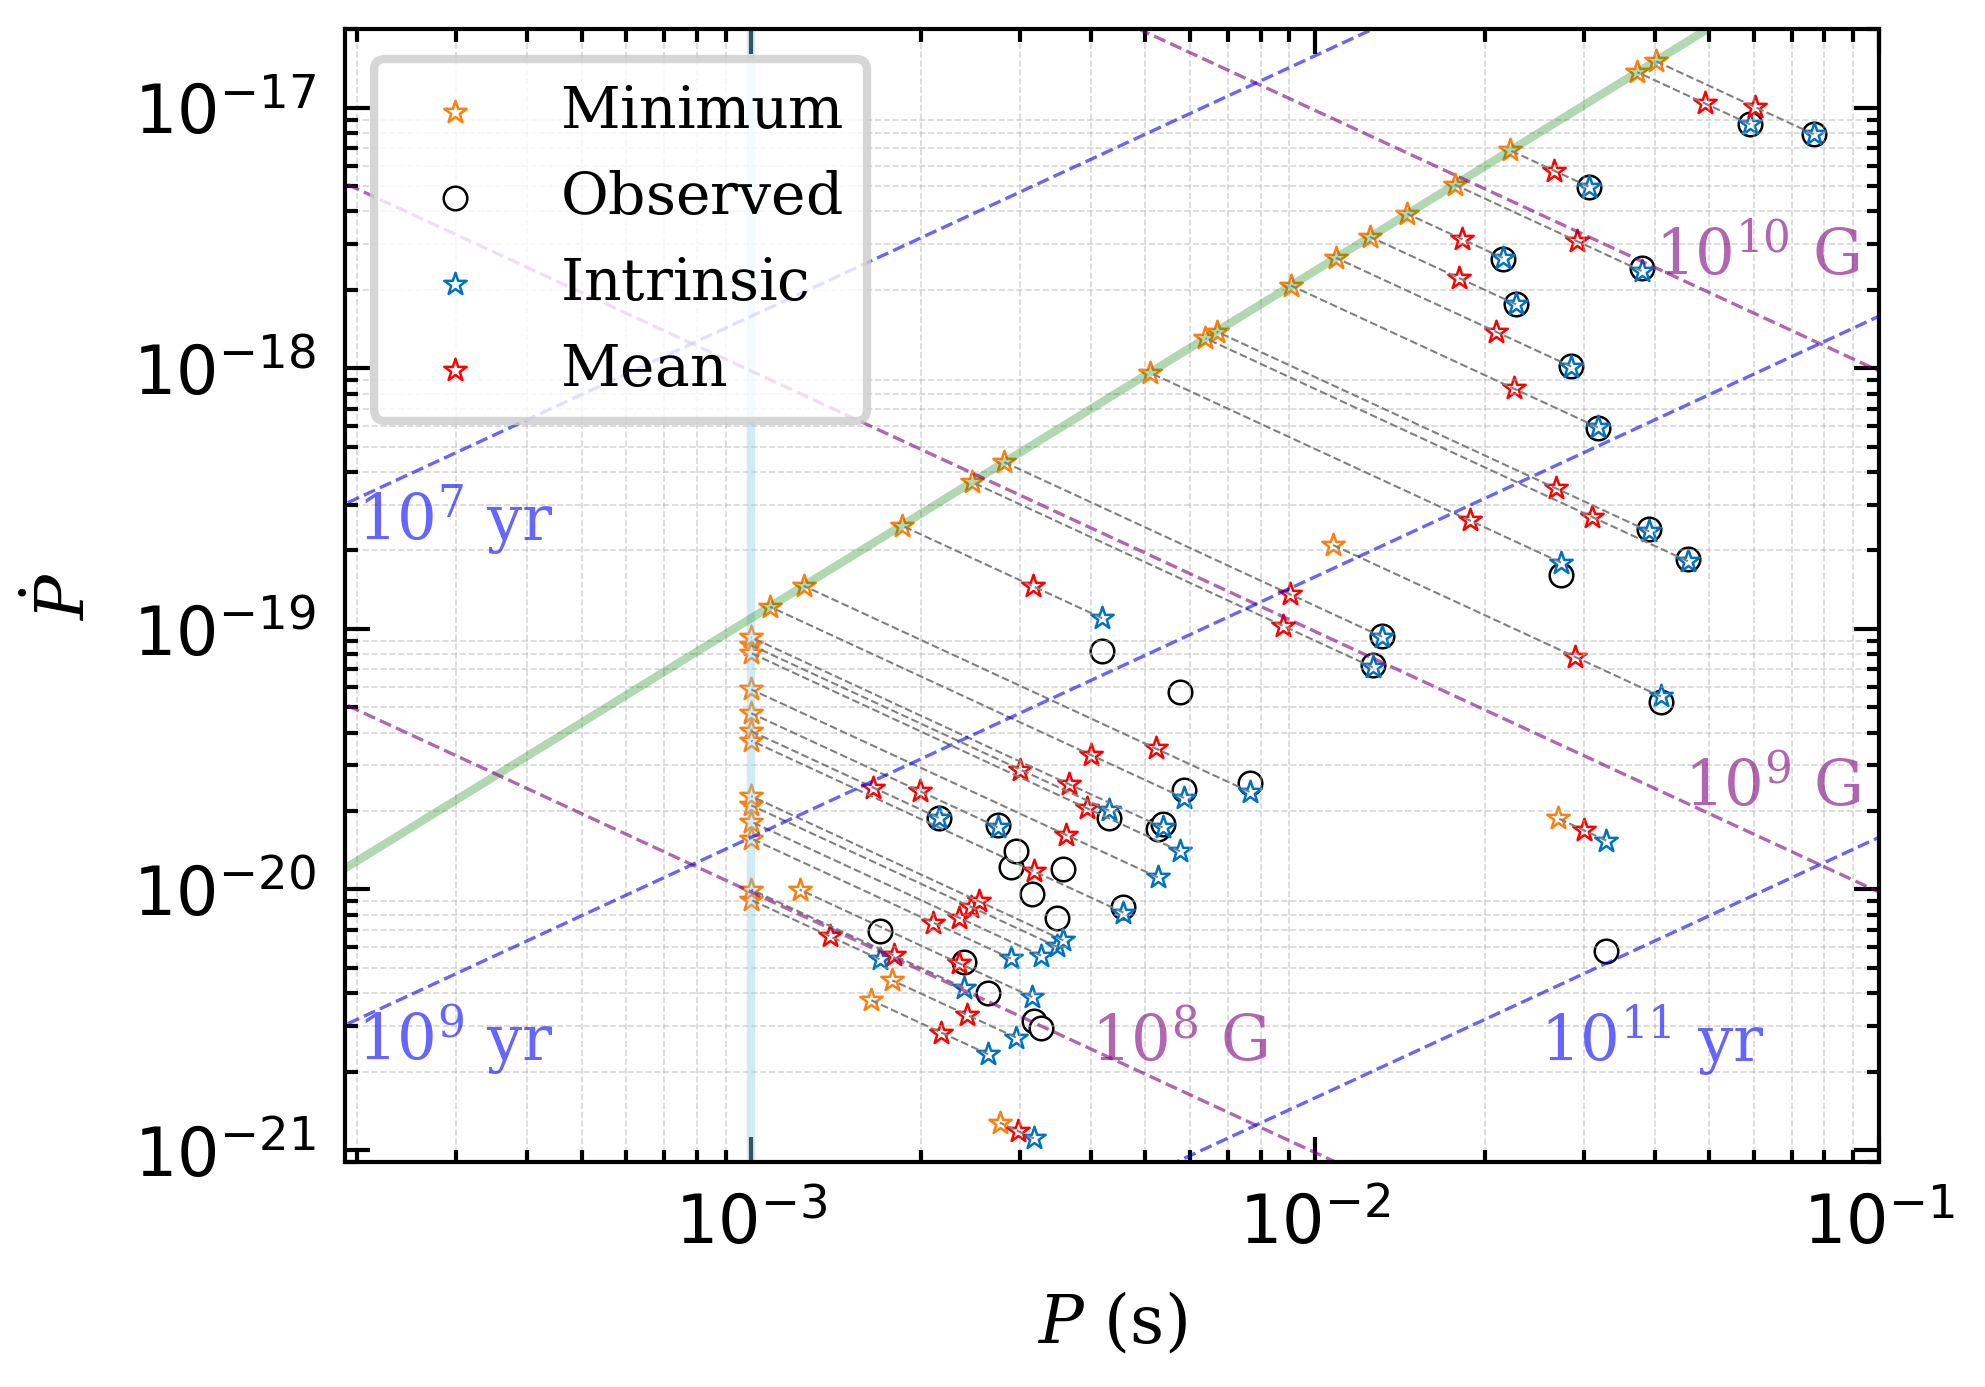

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
p_arr=np.linspace(0.0001,20,10000)
p=np.linspace(0.0001,20,10000)
fs=7.5
ybeg=0.001
al=0.6
pdot_arr=p_pdot_forb(p_arr)

plt.figure()
plt.grid(b=True, which='minor',linestyle='--',lw=0.2,alpha=0.5)

# spin-up line
plt.plot( p_arr, pdot_arr,c='green',alpha=0.3)
plt.scatter(data_a['p0_birth_lim'], data_a['p1_birth_lim'],marker='*',facecolor='white',
            edgecolors='#ff7f0e',lw=0.3,s=8,label=r'$\rm{Minimum}$')

# evolution trace
for i in range(len(data_a['p0'])):
    plt.plot([data_a['p0'][i],data_a['p0_birth_lim'][i]],[data_a['pdot_int'][i],data_a['p1_birth_lim'][i]],
             linewidth=0.25,ls='--',color='grey',alpha=1)

# observed, intrinsic and average value of (P, Pdot)
plt.scatter(data_a['p0'],data_a['p1'],marker='o',facecolor='white',edgecolors='k',lw=0.3,s=8,label=r'$\rm{Observed}$')
plt.scatter(data_a['p0'],data_a['pdot_int'],marker='*',facecolor='white',edgecolors='#0072c1',lw=0.3,s=8,label=r'$\rm{Intrinsic}$')
plt.scatter(p_birth_mean,p1_birth_mean,marker='*',facecolor='white',edgecolors='red',lw=0.3,s=8,label=r'$\rm{Mean}$')

# lines for constant magnetic field
plt.plot(p,pdot_mag(p,10**8),color='purple',ls='--',lw=0.4,alpha=al)
plt.plot(p,pdot_mag(p,10**9),color='purple',ls='--',lw=0.4,alpha=al)
plt.plot(p,pdot_mag(p,10**10),color='purple',ls='--',lw=0.4,alpha=al)
plt.text(4*10**(-3), 2.2*10**(-21), r'$\rm{10^{8} \,\, G}$', fontsize=fs, color='purple',alpha=al)
plt.text(4.5*10**(-2), 2.1*10**(-20), r'$\rm{10^{9} \,\, G}$', fontsize=fs, color='purple',alpha=al)
plt.text(4*10**(-2), 2.3*10**(-18), r'$\rm{10^{10} \,\, G}$', fontsize=fs, color='purple',alpha=al)

# lines for constant age 
plt.plot(p,pdot_year(p,10**11),color='blue',ls='--',lw=0.4,alpha=al)
plt.plot(p,pdot_year(p,10**9),color='blue',ls='--',lw=0.4,alpha=al)
plt.plot(p,pdot_year(p,10**7),color='blue',ls='--',lw=0.4,alpha=al)
plt.text(0.025, 2.2*10**(-21), r'$\rm{10^{11} \,\, yr}$', fontsize=fs, color='blue',alpha=al)
plt.text(2*10**(-4), 2.2*10**(-21), r'$\rm{10^{9} \,\, yr}$', fontsize=fs, color='blue',alpha=al)
plt.text(2*10**(-4), 2.2*10**(-19), r'$\rm{10^{7} \,\, yr}$', fontsize=fs, color='blue',alpha=al)

# the minimum cut of P (1 ms)
plt.vlines(0.001,10**(-22),2*10**(-17),color='skyblue',alpha=0.4)

plt.xscale('log')
plt.yscale('log')
plt.xlim([1.9*10**(-4),0.1])
plt.ylim([9*10**(-22),2*10**(-17)])
plt.legend(frameon=True,fontsize=7)
plt.xlabel(r'$P\,\,(\rm{s})$')
plt.ylabel(r'$\dot{P}$')
#plt.savefig('LASTlast_p.png')
plt.show()

# 4. calculating accreted using 
### (1) Tauris12
### (2) Li21 fit

## 1. Tauris12

In [54]:
def tauris_acc_m(p_eq):
    """
    calculate an accreted mass given an equilibrium period
    using an initial mass of 1.4 M_Sun
    see https://arxiv.org/abs/1206.1862  Eq.14
    paramaters:
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the accreted mass, unit: Solar mass
    """
    return 0.22*(1.4**(1/3))/(p_eq*1000)**(4/3)

# get accreted mass
delta_m_tau=np.zeros(nu*ns)
delta_m_tau=tauris_acc_m(pran)

## 2. Li21

In [55]:
def li_acc_m(p_eq):
    """
    calculate an accreted mass given an equilibrium period using the method in Li, Z.W., and et. al., 2021
    we fit the open circles in Figure 4. in arXiv:2108.02554v1, and obtain parameters: a = 0.28, b=-0.5.
    paramaters:
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the accreted mass, unit: Solar mass
    
    """
    a=0.28
    b=-0.5
    return a*(p_eq*1000)**b

def errf(p_eq):
    """
    calculate the 1-sigma error for Li21
    the 1-sigma is defined as 1/3 times of the difference between Tauris12  and the best fitted line in Li21
    -----
    p_eq: the period at equilibrium state, unit: s
    -----
    return :
    the errors of the accreted mass, unit: Solar mass
    
    """
    return (li_acc_m(p_eq)-tauris_acc_m(p_eq))/3

# get mean accreted mass
delta_m_li=np.zeros(nu*ns)
delta_m_li=li_acc_m(pran)

delta_m_birth_ran=np.zeros(ns*nu)
delta_m_birth_ran=np.random.normal(delta_m_li,errf(pran),ns*nu)

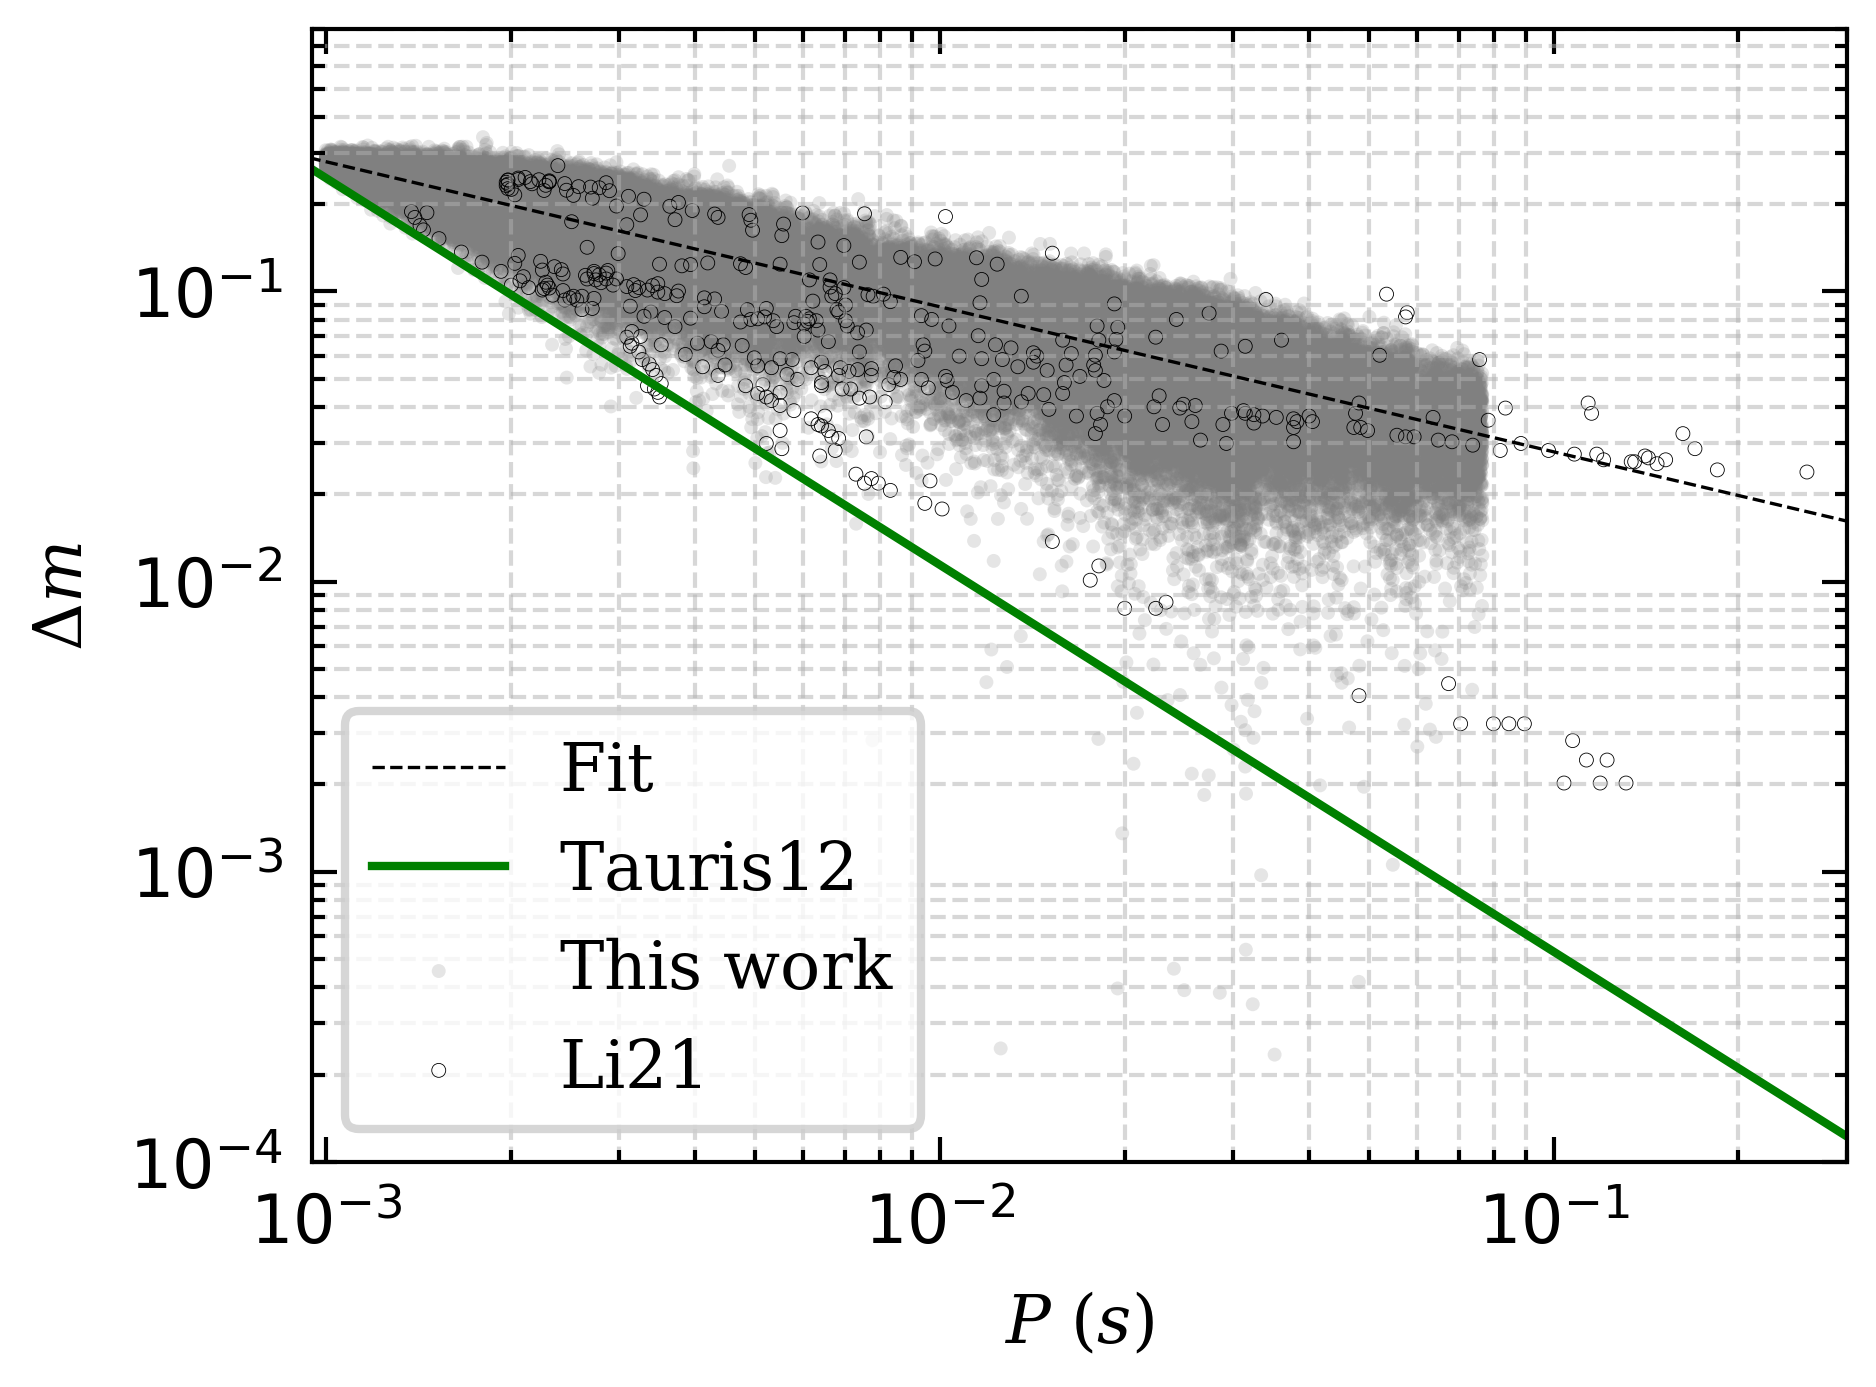

In [37]:
plt.style.use(['science','ieee','no-latex'])

xx=np.linspace(0.00023,0.3,1000)
s_deltam_all=np.loadtxt('zhenwei2021.txt')

plt.figure()
plt.grid(b=True, which='minor',linestyle='--',alpha=0.5)
plt.plot(xx,li_acc_m(xx),c='k',ls='--',lw=0.4,label=r'$\rm{Fit}$')

plt.scatter(pran,delta_m_birth_ran,s=2.8,lw=0.4,facecolor='grey',edgecolors='none',alpha=0.2,label=r'$\rm{This\,\, work}$')
plt.scatter(s_deltam_all[:,0],s_deltam_all[:,1],s=2.8,lw=0.1,facecolor='none',edgecolors='k',label=r'$\rm{Li21}$')
plt.plot(xx,tauris_acc_m(xx),c='green',label=r'$\rm{Tauris12}$')

plt.yscale('log')
plt.xlim(0.00095,0.3)
plt.ylim(10**(-4),0.8)
plt.xlabel(r'$P\,\,(s)$')
plt.ylabel(r'$\Delta m$')
plt.legend(frameon=True)
plt.xscale('log')
plt.savefig('log_accM_p.jpg')
plt.show()

# 5 . $m_{\rm{birth}}=m_{\rm rec} - \Delta m $

In [226]:
data_exp_m_obs=np.zeros(ns*nu)

# re-sampling the observed mass
for i in range(len(data_a['m'])):
    data_exp_m_obs[i*5000:(i+1)*5000]=np.random.normal(data_a['m'][i],data_a['merr'][i],5000)
    
# birth mass: Tauris, Li21    
m_b_tau=data_exp_m_obs-delta_m_tau
m_birth=data_exp_m_obs-delta_m_birth_ran

# two type mass
## slow NS
## recycled NS

In [227]:
# get the masses and errors of slow pulsars, 13 in total

nsl=13
slow_ns=np.zeros((nsl,2))
slow_ns[0,0]=1.27                   # mass of J1141−6545
slow_ns[0,1]=0.01                   # mass error of J1141−6545
slow_ns[1,0]=1.291                  # mass of J1906+0746, ignore the plusar mass as p=144ms >> 1ms
slow_ns[1,1]=0.011                  # mass error of J1906+0746
slow_ns[2:,0]=data_a['mc'][0:11]    # the companions of all the double pulsars are slow NS
slow_ns[2:,1]=data_a['mcerr'][0:11] # the error of mass for companions 

# re-sampling the observed slow NS mass
slow_exp=np.zeros(nsl*5000)
for i in range(nsl):
    slow_exp[i*5000:(i+1)*5000]=np.random.normal(slow_ns[i,0],slow_ns[i,1],5000)

In [260]:
# get the recycled NS mass  
rec_ns=np.zeros((35,2))
rec_ns[:,0]=np.array(data_a['m'])
rec_ns[:,1]=np.array(data_a['merr'])

array([[1.3410e+00, 7.0000e-03],
       [1.3381e+00, 7.0000e-04],
       [1.3330e+00, 2.0000e-04],
       [1.3384e+00, 9.0000e-04],
       [1.3400e+00, 8.0000e-02],
       [1.4398e+00, 2.0000e-04],
       [1.6200e+00, 3.0000e-02],
       [1.5590e+00, 5.0000e-03],
       [1.3060e+00, 4.0000e-03],
       [1.3580e+00, 1.0000e-02],
       [1.3655e+00, 2.1000e-03],
       [1.7100e+00, 1.6000e-01],
       [1.6660e+00, 1.2000e-02],
       [1.3800e+00, 1.3000e-01],
       [1.5000e+00, 2.0000e-01],
       [1.4359e+00, 3.0000e-04],
       [2.0800e+00, 7.0000e-02],
       [1.4860e+00, 1.1000e-02],
       [1.9080e+00, 1.6000e-02],
       [1.8280e+00, 2.2000e-02],
       [1.3300e+00, 1.1000e-01],
       [1.6400e+00, 1.5000e-01],
       [1.3530e+00, 1.7000e-02],
       [1.4960e+00, 2.3000e-02],
       [1.3500e+00, 7.0000e-02],
       [1.7200e+00, 1.6000e-01],
       [1.5400e+00, 1.3000e-01],
       [1.4400e+00, 7.0000e-02],
       [1.4700e+00, 7.0000e-02],
       [1.2900e+00, 1.0000e-01],
       [1.

# combing the two types of mass into a single array as observbles

In [230]:
rec_slow_oran=np.zeros((ns*nu)+13*5000)
rec_slow_oran[0:(ns*nu)]=data_exp_m_obs
rec_slow_oran[(ns*nu):((ns*nu)+13*5000)]=slow_exp

## combine the birth mass data of recycled pulsars and slow NS
## recycled ones: calculated by Li21 (HF) and Tauris12 (LF)

In [232]:
rec_slow_cal_tau=np.zeros((ns*nu)+13*5000)
rec_slow_cal_tau[0:(ns*nu)]=m_b_tau
rec_slow_cal_tau[(ns*nu):((ns*nu)+13*5000)]=slow_exp

rec_slow_cal=np.zeros((ns*nu)+13*5000)
rec_slow_cal[0:(ns*nu)]=m_birth
rec_slow_cal[(ns*nu):((ns*nu)+13*5000)]=slow_exp


np.savetxt('oran.txt',rec_slow_oran)
np.savetxt('cal_li.txt',rec_slow_cal)
np.savetxt('cal_tau.txt',rec_slow_cal_tau)